In [2]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title = imdb_title_basics_df

q_4 = imdb_title["runtime_minutes"].value_counts().quantile(1)
q_3 = imdb_title["runtime_minutes"].value_counts().quantile(.75)
q_2 = imdb_title["runtime_minutes"].value_counts().quantile(.5)
q_1 = imdb_title_basics_df["runtime_minutes"].value_counts().quantile(.25)

q_1 , q_2 , q_3, q_4

#Initial attempt to get the range of the occurances using quartile range in the value_counts
#shows broad range, shouldn't look at any below q_3

(1.0, 13.0, 237.5, 7131.0)

In [68]:
most_common = imdb_title["runtime_minutes"].value_counts().index[0]
most_common
# can use most common number to see what genre's tend to fall within this length

90.0

In [51]:
imdb_title.loc[imdb_title['runtime_minutes'] == 90, ['genres']].value_counts().to_frame()
#above seeing what genre of film occurs most often when it is the length of the most common
#runtime
#can use to give a more pinpoint specific film to create

,0
genres,
Documentary,1195
Drama,1132
Comedy,617
Horror,284
"Comedy,Drama",223
...,...
"Biography,Comedy,History",1
"Horror,Romance,Sci-Fi",1
"Biography,Comedy,Crime",1


Text(0.5, 0, 'Run Times in Minutes')

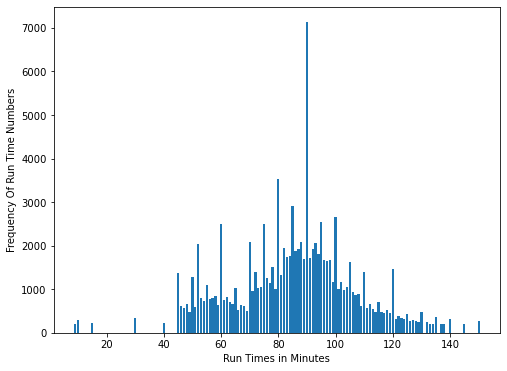

In [52]:
va = imdb_title['runtime_minutes'].value_counts().nlargest(100)

vas = imdb_title['runtime_minutes'].value_counts().index[0:100]
va, vas
fig, ax =plt.subplots(figsize = (8,6))
ax.bar(vas , va )
ax.set_ylabel("Frequency Of Run Time Numbers")
ax.set_xlabel("Run Times in Minutes")
# 

In [ ]:
#Graph that shows frequncy of runtimes
# coan later show counts with genre's 
#run time really helps

In [70]:

# x = imdb_title_basics_df['runtime_minutes']
# x = x[x.between(x.quantile(.99), x.quantile(1))]
# x.head(25)

In [12]:
rt_movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
rt_movie = rt_movie_info_df
rt_movie.head(2)
# new data frame to work on

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [45]:
rt_movie['running_mins']=rt_movie['runtime'].str.split()
rt_movie['running_mins']=rt_movie['running_mins'].str[0]
rt_movie['running_mins'] = rt_movie['running_mins'].astype(float)
# change runtime from a string to a solo float number

In [ ]:
#function to do what was above, just grabbing the float number from the string
def string_to_float(df, series):
    df[series] = df[series].str.split()
    df[series] = df[series].str[0]
    df[series] = df[series].astype(float)
    return df[series]
    

In [73]:
q_4 = rt_movie["running_mins"].value_counts().quantile(1)
q_3 = rt_movie["running_mins"].value_counts().quantile(.75)
q_2 = rt_movie["running_mins"].value_counts().quantile(.5)
q_1 = rt_movie["running_mins"].value_counts().quantile(.25)
q_1 , q_2, q_3, q_4
# shows broad range and may want to ignore anything below q_3

(1.0, 3.0, 18.0, 72.0)

In [53]:
j = rt_movie['running_mins'].value_counts().index[:100]
l = rt_movie['running_mins'].value_counts().nlargest(100)
#grabbbing 100 most common runtimes from rotten tomatoes file
 

Text(0.5, 0, 'Run Times in Minutes')

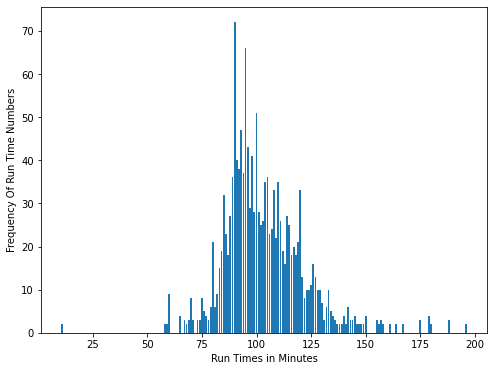

In [55]:
fig_rt , ax = plt.subplots(figsize = (8,6))
ax.bar(j , l)
ax.set_ylabel("Frequency Of Run Time Numbers")
ax.set_xlabel("Run Times in Minutes")
# plot showing top 100 most common runtimes

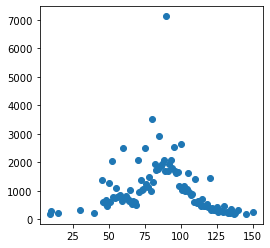

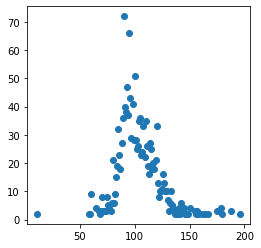

In [58]:
fig_IMDB, ax =plt.subplots(figsize = (4,4))
ax.scatter(vas , va )

fig_Rotten , ax= plt.subplots(figsize = (4,4))
ax.scatter(j , l)
#graphs showing both of the top 100 most occurred time for IMDB File 'first graph' and Rotten Tomatoes File 'second graph' 
#shows that the range of most common movie length falls in between 80 to 110 minutes



In [ ]:
#hue color for box office strength

In [ ]:
imdb_title_basics_df['use_runtime'] = imdb_title_basics_df['runtime_minutes'].value_counts()
imdb_title_basics_df
#created use_runtime colomn 

<AxesSubplot:xlabel='runtime_minutes'>

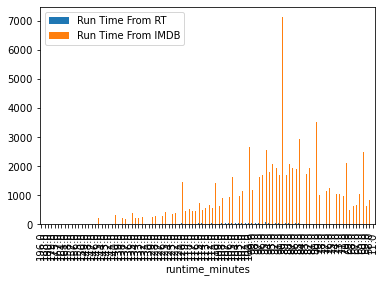

In [76]:
df_new_df = pd.DataFrame()

df_new_df['Run Time From RT'] = l 
df_new_df['Run Time From IMDB'] = va
# df_new_df['Box Office From RT Movies'] = 
df_new_df.index.name = 'runtime_minutes'
df_new_df.sort_values(by = 'runtime_minutes', ascending = False, inplace = True)
df_new_df

df_new_df.plot(kind= 'bar')
#graph of occurences of time lengths of movies. Shows unwise to plot both on same graph 